### importing libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
for col in company_data.columns:
    print(company_data[col].groupby(company_data[col]).count())

Sales
0.00     1
0.16     1
0.37     1
0.53     1
0.91     1
        ..
13.91    1
14.37    1
14.90    1
15.63    1
16.27    1
Name: Sales, Length: 336, dtype: int64
CompPrice
77     1
85     1
86     1
88     1
89     2
      ..
157    2
159    2
161    1
162    2
175    1
Name: CompPrice, Length: 73, dtype: int64
Income
21     4
22     4
23     1
24     4
25     6
      ..
116    1
117    6
118    4
119    4
120    4
Name: Income, Length: 98, dtype: int64
Advertising
0     144
1       8
2       9
3      14
4      12
5      19
6       7
7      16
8      11
9      10
10     25
11     22
12     16
13     20
14     11
15     12
16     11
17      6
18      6
19      8
20      4
21      1
22      2
23      2
24      1
25      1
26      1
29      1
Name: Advertising, dtype: int64
Population
10     1
12     1
13     1
14     1
16     2
      ..
503    1
504    1
507    1
508    2
509    1
Name: Population, Length: 275, dtype: int64
Price
24     1
49     1
53     1
54     1
55     1
      ..


In [5]:
def countplot(x):
    sns.countplot(x)

In [6]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
col = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']

In [8]:
for i in col:
    print(i)

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US


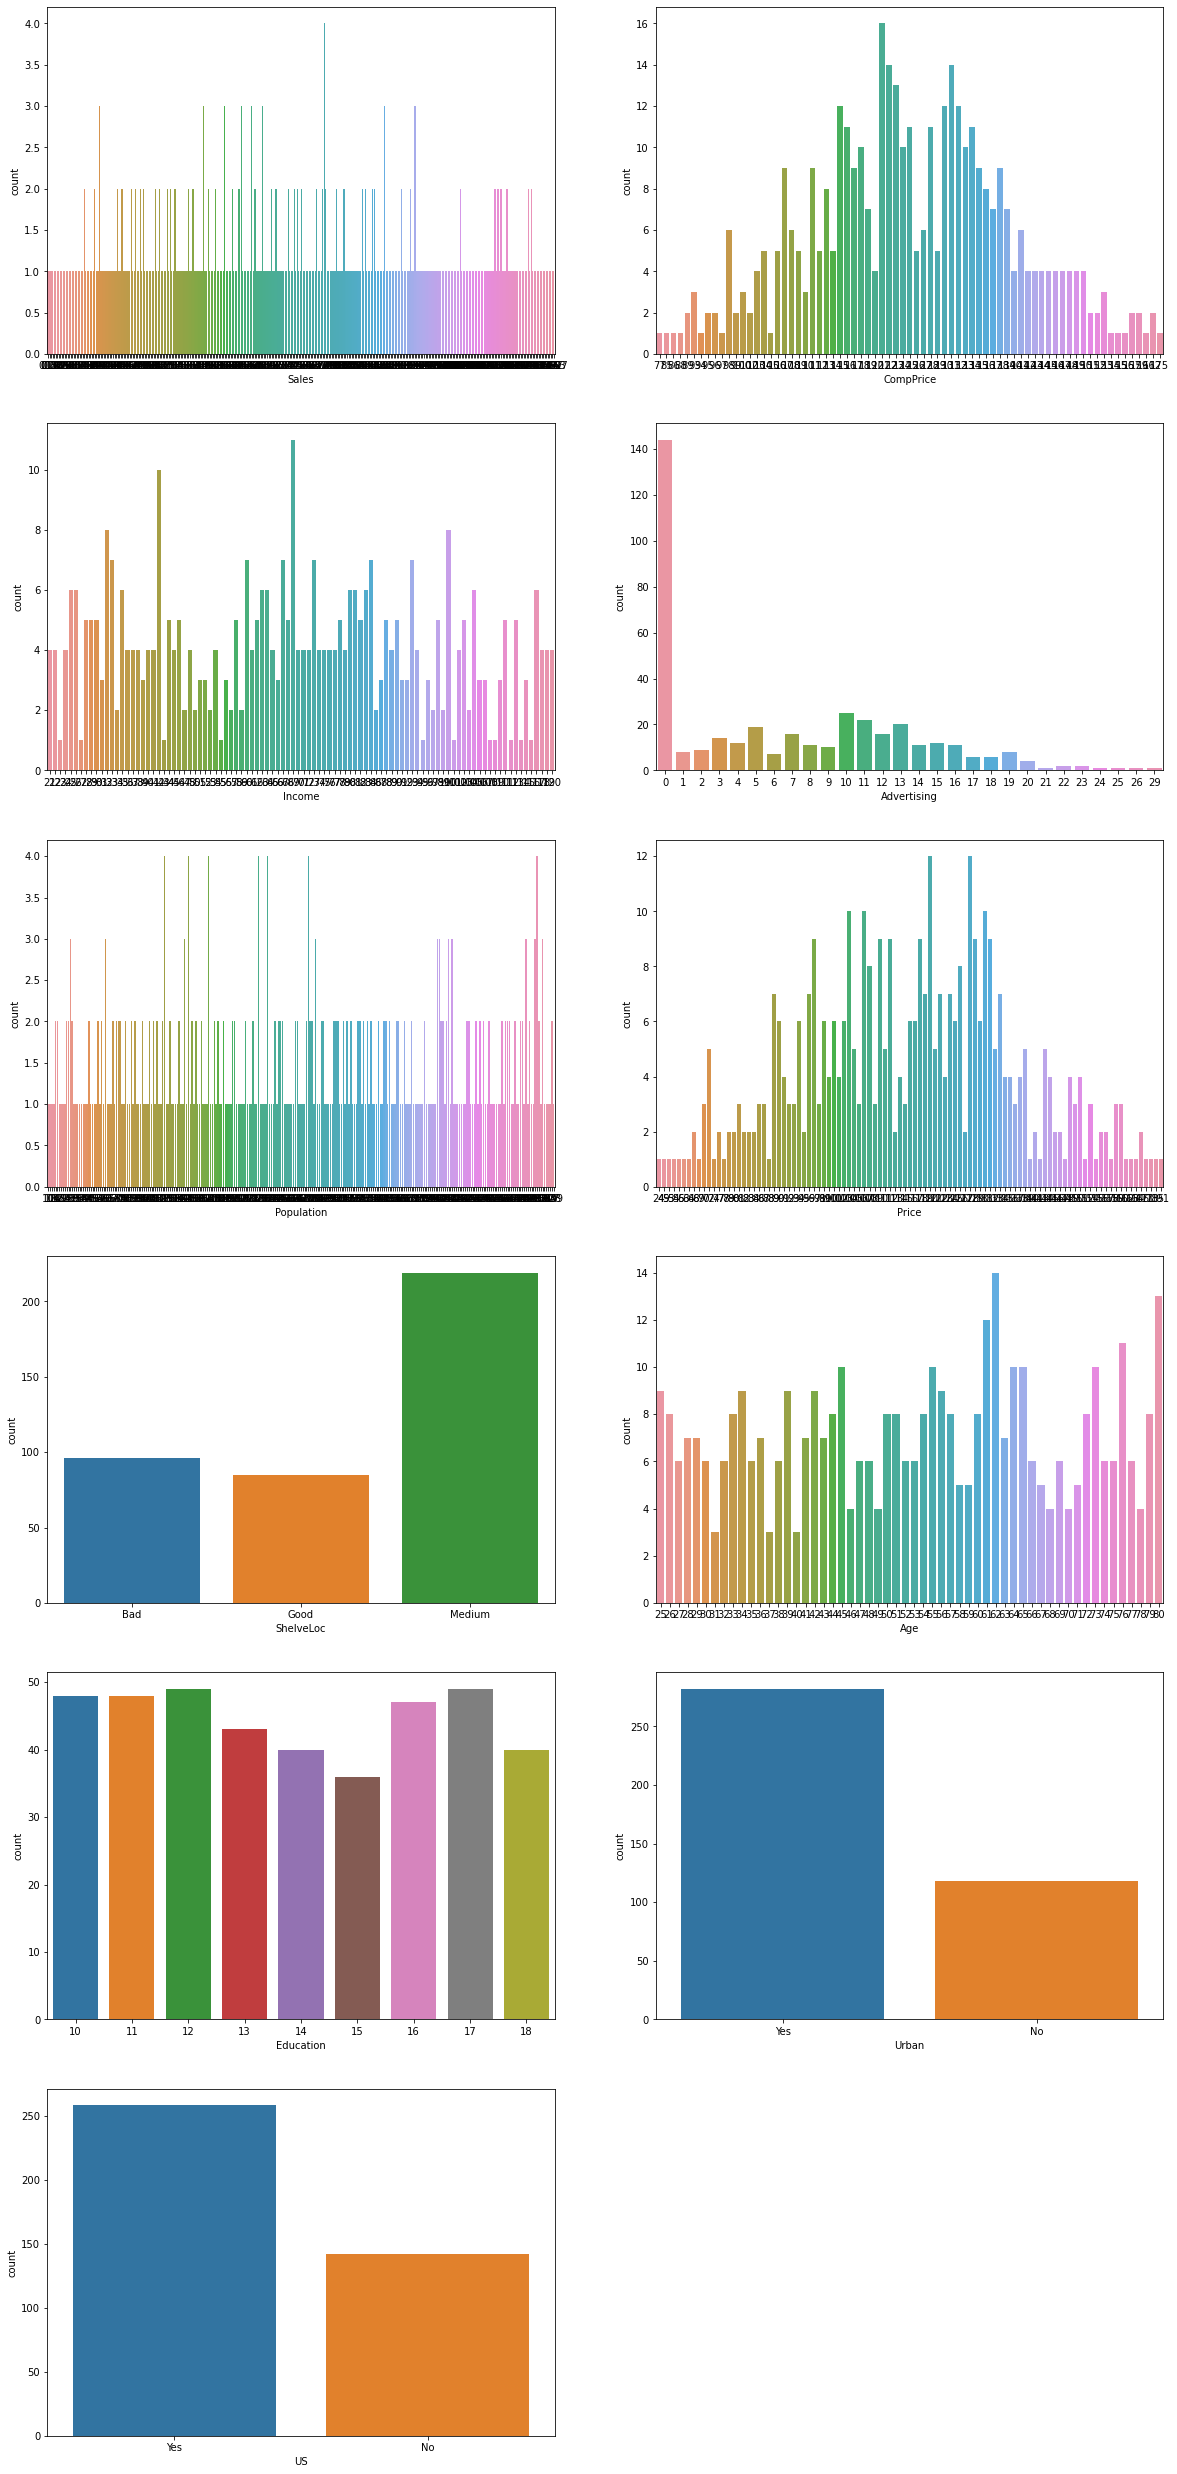

In [9]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for i in col:
    ax = plt.subplot(8,2,plotnumber)
    countplot(company_data[i])
    plotnumber += 1

### converting catogorical feature 

In [10]:
company_data_copy = company_data.copy()

In [11]:
company_data_copy.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

**our output sales has to convert into catogorical feature** it range is 0-16.27

In [48]:
company_data_copy['Sales'] = pd.cut(company_data_copy.Sales, 2, labels=range(1, 3))
company_data_copy

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [27]:
min(company_data_copy.Sales),max(company_data_copy.Sales)

(1, 5)

In [49]:
le = LabelEncoder()
company_data_copy['ShelveLoc'] = le.fit_transform(company_data_copy['ShelveLoc'])
company_data_copy['Urban'] = le.fit_transform(company_data_copy['Urban'])
company_data_copy['US'] = le.fit_transform(company_data_copy['US'])
company_data_copy

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [50]:
company_data_copy.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
dtype: object

### checking for any outlier

TypeError: Horizontal orientation requires numeric `x` variable.

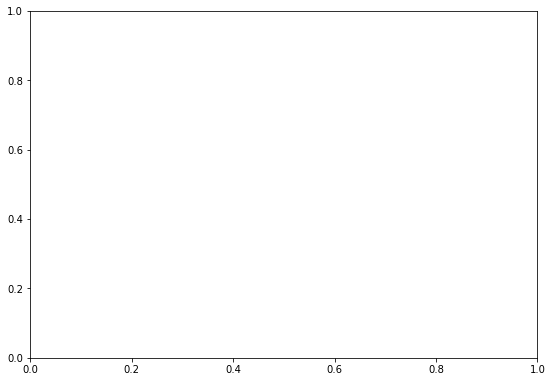

In [51]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for i in col:
    ax = plt.subplot(8,2,plotnumber)
    sns.boxplot(company_data_copy[i])
    plotnumber += 1

## Model building

In [52]:
X = company_data_copy.iloc[:,1:]
y = company_data_copy.iloc[:,:1]

In [53]:
y

,Sales
0,1
1,2
2,2
3,1
4,1
...,...
395,2
396,1
397,1
398,1


In [54]:
X.mean()

CompPrice      124.9750
Income          68.6575
Advertising      6.6350
Population     264.8400
Price          115.7950
ShelveLoc        1.3075
Age             53.3225
Education       13.9000
Urban            0.7050
US               0.6450
dtype: float64

In [55]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X,columns=X.columns)
scaled_X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881


In [83]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y,test_size=0.15,random_state=12,stratify=y)
X_train.shape,X_test.shape

((340, 10), (60, 10))

### model testing and training

<AxesSubplot:xlabel='Sales', ylabel='count'>

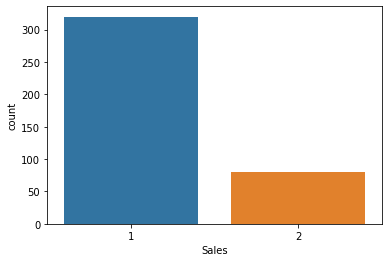

In [84]:
sns.countplot(company_data_copy.Sales)

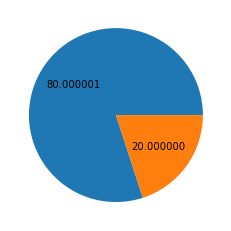

In [138]:
plt.pie(y_train.value_counts(), autopct='%2f')
plt.show()

In [253]:
dt_model = DecisionTreeClassifier(random_state=13,class_weight={1:1,2:3})
dt_model.fit(X_train,y_train)
y_pred_test = dt_model.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred_test))
print('recall', recall_score(y_test, y_pred_test, average='micro'))
print('precision', precision_score(y_test, y_pred_test, average='micro'))
print('roc', roc_auc_score(y_test, y_pred_test, multi_class='rise'))
print(confusion_matrix(y_test, y_pred_test))


accuracy 0.85
recall 0.85
precision 0.85
roc 0.71875
[[45  3]
 [ 6  6]]


**we got 85% accuracy for testing data and 100% for training data with max depth 11, it is the best, our trainig data is overfitting
but it is the best score**

In [243]:
dt_model = DecisionTreeClassifier(random_state=13,class_weight={1:1,2:3},max_depth=2)
dt_model.fit(X_train,y_train)
y_pred_train = dt_model.predict(X_train)
print('accuracy  : ', accuracy_score(y_train, y_pred_train))
print('recall', recall_score(y_train, y_pred_train))
print('precision', precision_score(y_train, y_pred_train))
print('roc', roc_auc_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

accuracy  :  0.8529411764705882
recall 0.9816176470588235
precision 0.8557692307692307
roc 0.6599264705882353
[[267   5]
 [ 45  23]]


#### our model is overfitting, by using gridsearchCv we're finding max depth of the tree

In [234]:
grid = GridSearchCV(estimator=dt_model,param_grid={'max_depth':range(15)})
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={1: 1, 2: 3},
                                              random_state=13),
             param_grid={'max_depth': range(0, 15)})

In [235]:
grid.best_params_

{'max_depth': 2}

In [236]:
grid.best_score_

0.8264705882352942